## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
rental = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [5]:
rental.shape

(730, 16)

In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Note
As yr and month has been covered seperately there is no need for the column dteday as the date is unique for each entry. Similarly we can drop the 'instant' column. The 'casual' and 'registered' column are not a determining variable for the 'cnt' so we can also remove those column in our analysis.

In [7]:
rental=rental.drop(['dteday','instant','casual','registered'],axis=1)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
rental.shape

(730, 12)

In [9]:
rental.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

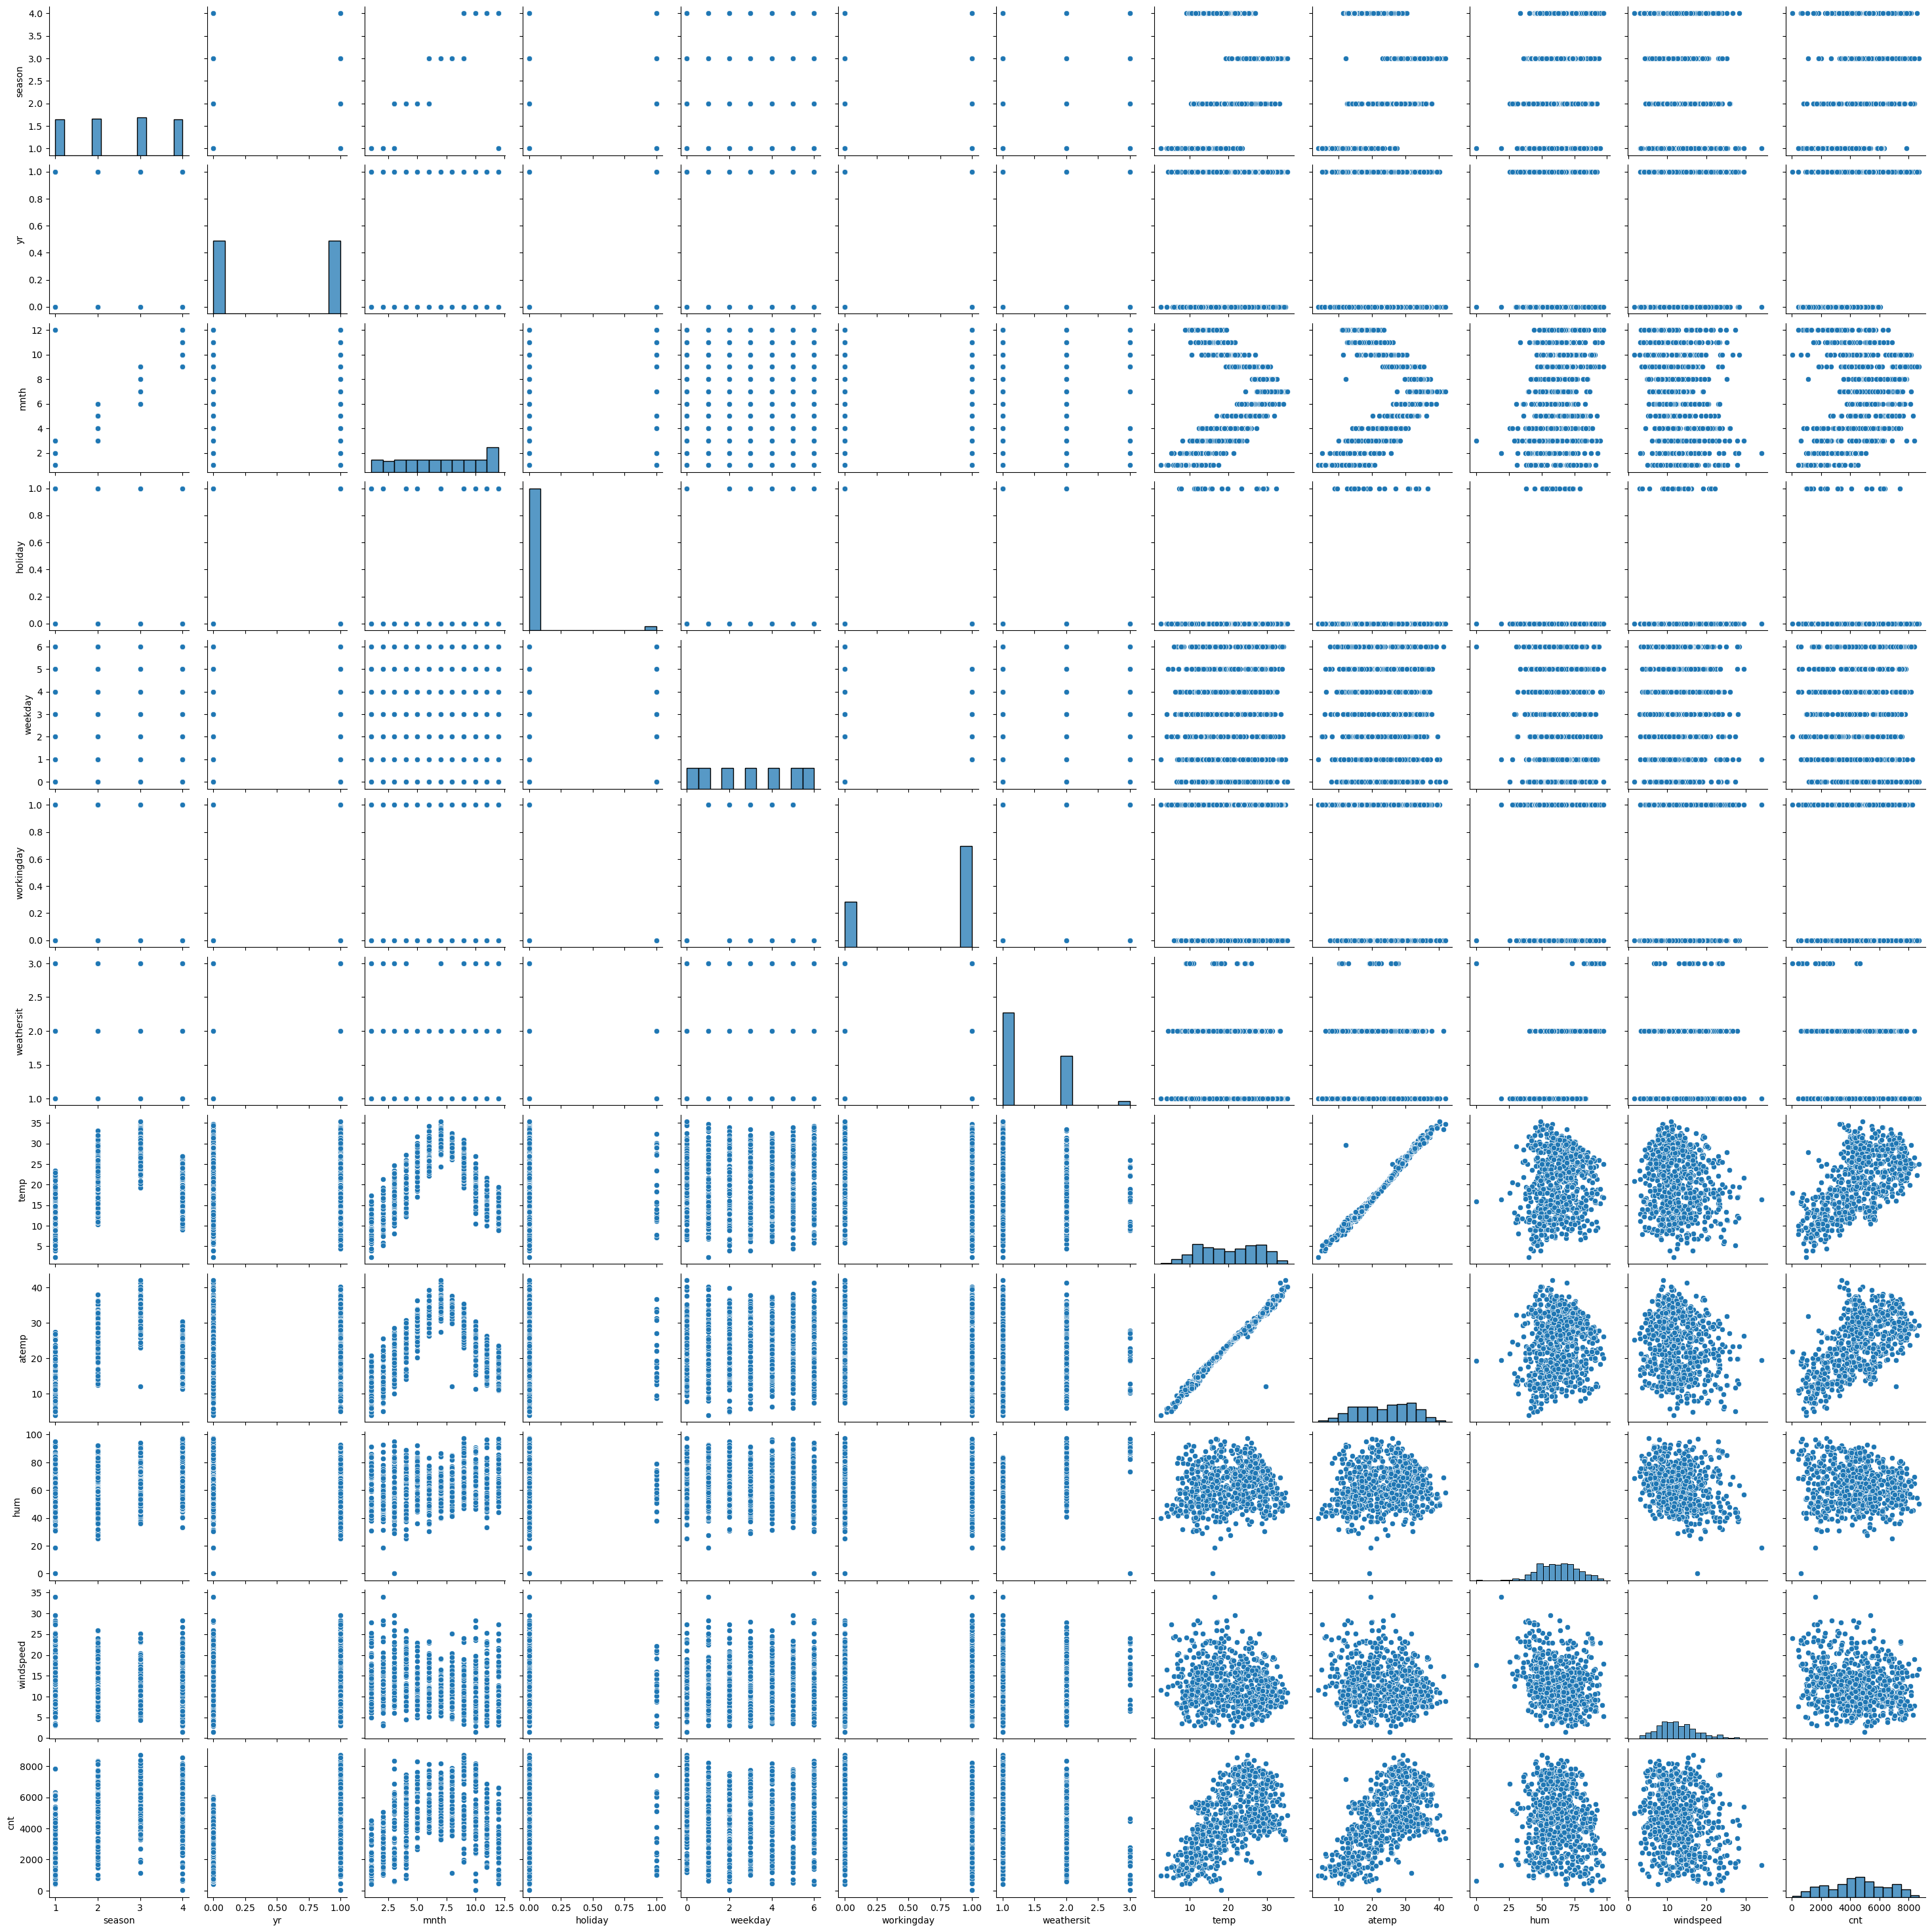

In [11]:
sns.pairplot(rental)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables like season, year, month,holiday,weekday,workingday,weathersit. Let's make a boxplot for these variables.

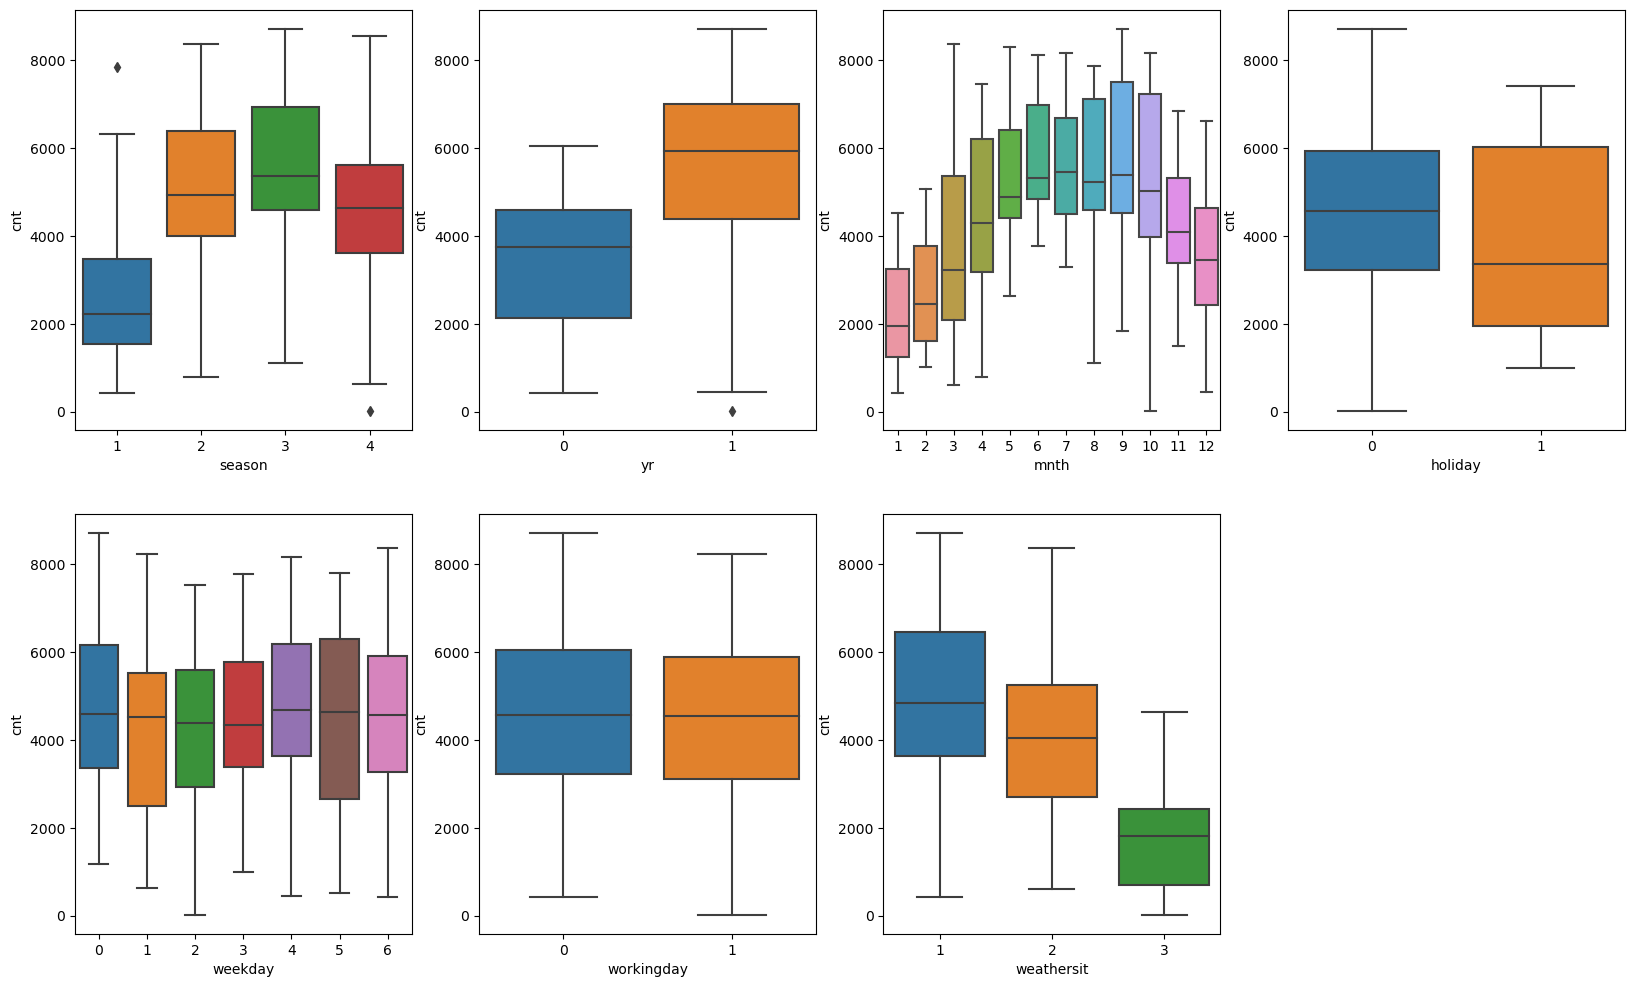

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rental)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.show()

### Note
We can observe that there is not any significant impact of 'workingday' and 'weekday' in the bike rent so we are going to drop these column from analysis.

In [13]:
rental=rental.drop(['weekday','workingday'],axis=1)
rental.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600


We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `weathersit` as the hue.

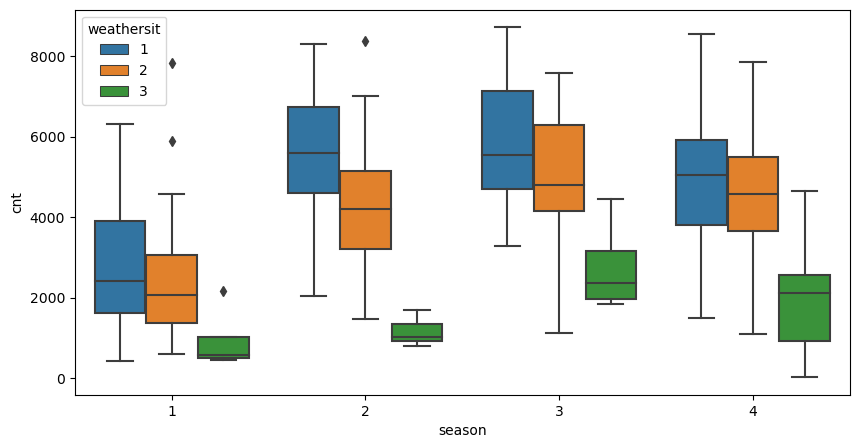

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = rental)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

The variables 'season', 'month','weathersit'  are categorical variables and has multiple levels. We need to assign dummy variables for these categorical variables as categorical variables are not inherently ordinal i.e there is no inherent numerical relationship between the categories.

In [15]:
rental['season']=rental['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
rental['mnth']=rental['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
rental['weathersit']=rental['weathersit'].map({1:'clear_weather',2:'cloudy_weather',3:'little_snow&rain_weather',4:'rainy_weather'})

In [16]:
rental.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,cloudy_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,cloudy_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,clear_weather,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Get the dummy variables for the feature 'season','weathersit' & 'mnth' and store it in a new variable - 'new1','new2','new3'
new1 = pd.get_dummies(rental['season'])
new2 = pd.get_dummies(rental['weathersit'])
new3 = pd.get_dummies(rental['mnth'])

In [18]:
# Check what the dataset 'status' looks like
new1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. We can drop column 1, as this can be identified by the remaining columns.
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [19]:
# Let's drop the first column from status df using 'drop_first = True'
new1 = pd.get_dummies(rental['season'],drop_first=True)
new2 = pd.get_dummies(rental['weathersit'],drop_first=True)
new3 = pd.get_dummies(rental['mnth'],drop_first=True)

In [20]:
# Add the results to the original housing dataframe

rental = pd.concat([rental, new1, new2, new3], axis = 1)

In [21]:
# Now let's see the head of our dataframe.

rental.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,june,mar,may,nov,oct,sep
0,spring,0,jan,0,cloudy_weather,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,cloudy_weather,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,clear_weather,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,clear_weather,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,clear_weather,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Drop 'season', 'weathersit', 'mnth' as we have created the dummies for it

rental.drop(['season','mnth','weathersit'], axis = 1, inplace = True)

In [23]:
rental.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,june,mar,may,nov,oct,sep
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Here we can see that the columns have values of different range. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,june,mar,may,nov,oct,sep
653,1,0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,june,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


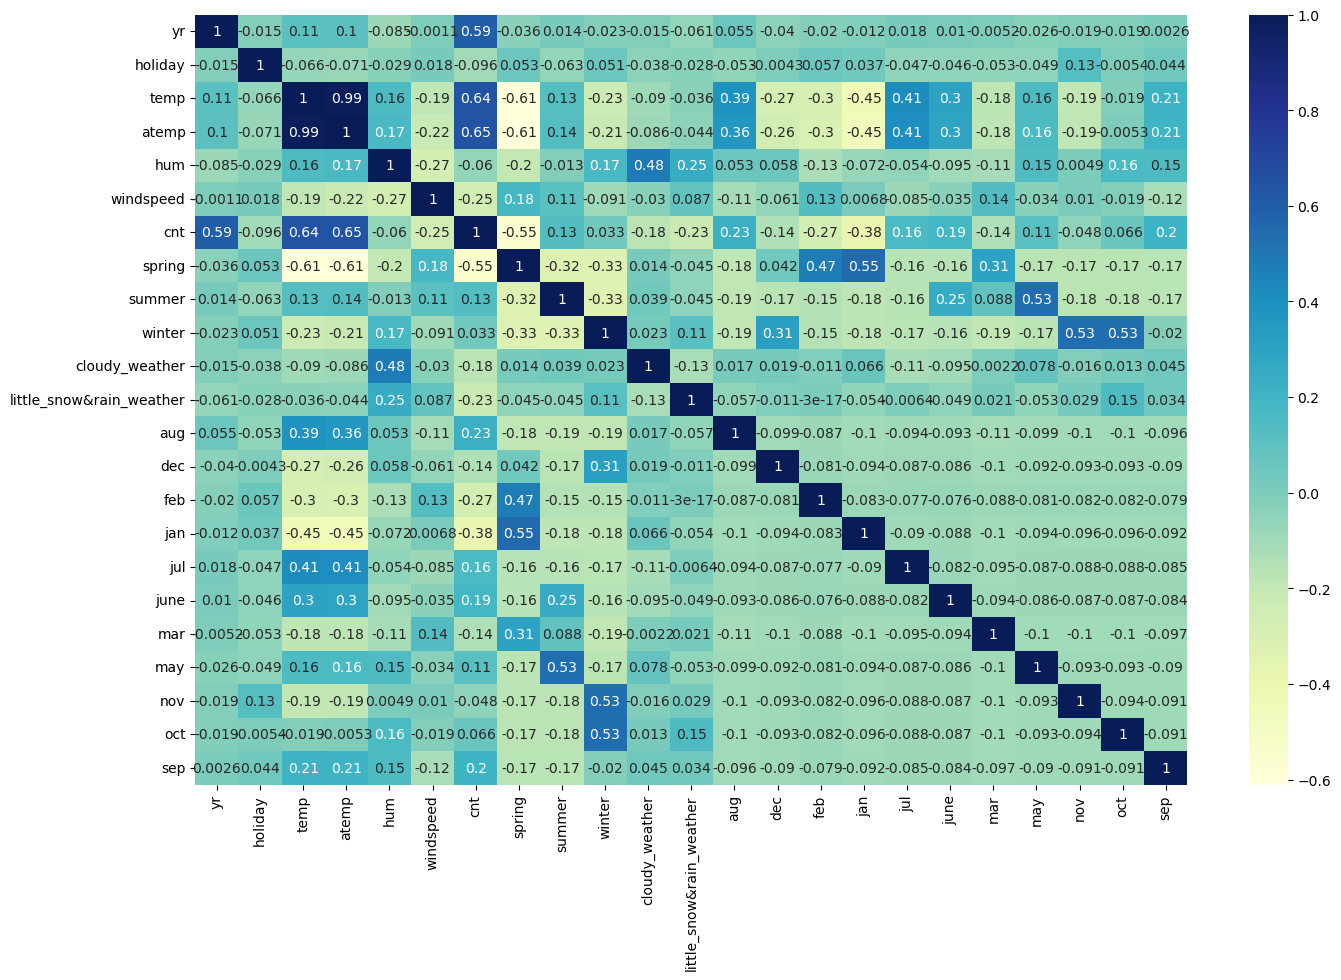

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`atemp` seems to be correlated to `cnt` the most. Let's see a pairplot for `cnt` vs `atemp`.

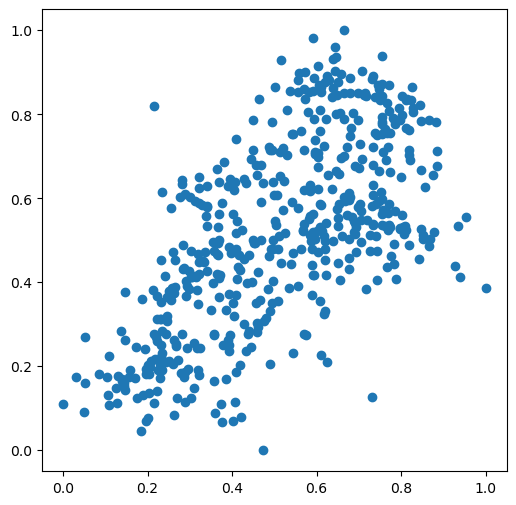

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [33]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [34]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

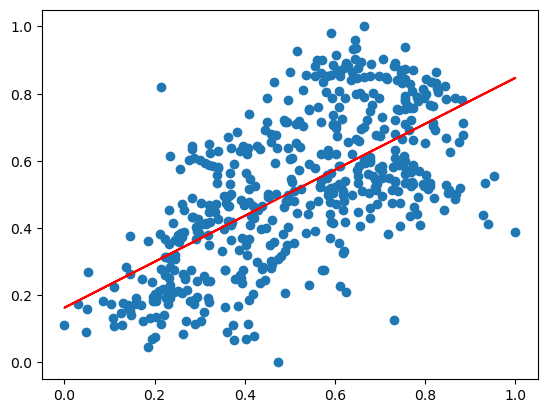

In [35]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [36]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.10e-61
Time:                        21:55:39   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `temp`.

In [37]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [38]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [39]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.95e-60
Time:                        21:55:42   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

There is no significant improvement in the R squared value.

In [40]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp','temp','yr','aug','june','jul']]

In [41]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.036508
atemp    0.421761
temp     0.296326
yr       0.235786
aug     -0.059894
june    -0.038516
jul     -0.125140
dtype: float64

In [42]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 17 May 2023   Prob (F-statistic):          5.88e-132
Time:                        21:55:45   Log-Likelihood:                 354.71
No. Observations:                 510   AIC:                            -695.4
Df Residuals:                     503   BIC:                            -665.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.017      2.177      0.0

The R squared value has been improved a lot. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [43]:
# Check all the columns of the dataframe

rental.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'cloudy_weather', 'little_snow&rain_weather', 'aug',
       'dec', 'feb', 'jan', 'jul', 'june', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [44]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                       0.328581
yr                          0.231006
holiday                    -0.087717
temp                        0.433029
atemp                       0.027400
hum                        -0.168548
windspeed                  -0.186997
spring                     -0.047961
summer                      0.040128
winter                      0.105207
cloudy_weather             -0.056140
little_snow&rain_weather   -0.246332
aug                         0.018874
dec                        -0.039379
feb                        -0.030535
jan                        -0.057190
jul                        -0.041233
june                       -0.002648
mar                         0.005844
may                         0.025124
nov                        -0.038777
oct                         0.007883
sep                         0.085887
dtype: float64

In [45]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.04e-182
Time:                        21:55:49   Log-Likelihood:                 517.56
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     487   BIC:                            -891.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,431.78
3,atemp,378.96
4,hum,37.20
8,winter,11.69
6,spring,11.65
7,summer,6.67
20,oct,6.36
19,nov,6.00
11,aug,5.91
5,windspeed,5.30


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.844`. Let's go ahead and drop this variables

In [48]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [49]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 17 May 2023   Prob (F-statistic):          9.22e-184
Time:                        21:55:53   Log-Likelihood:                 517.54
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     488   BIC:                            -897.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.12
2,temp,36.46
7,winter,11.66
5,spring,11.63
6,summer,6.63
19,oct,6.35
18,nov,6.00
10,aug,5.78
14,jul,5.19
13,jan,5.13


### Dropping the Variable and Updating the Model

As we can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

The variable `aug` has a significantly high VIF (`5.78`) and a high p-value (`0.598`) as well. Hence, this variable isn't of much use and should be dropped.

In [52]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('aug', 1)

In [53]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 17 May 2023   Prob (F-statistic):          8.98e-185
Time:                        21:55:54   Log-Likelihood:                 517.40
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     489   BIC:                            -903.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.57
2,temp,23.05
7,winter,11.26
5,spring,10.37
17,nov,5.46
18,oct,5.33
12,jan,5.12
4,windspeed,5.00
10,dec,4.55
6,summer,3.96


### Dropping the variable and updating the model

From the summary, we can still see some of them have a high p-value. `oct` for instance, has a p-value of 0.962. We should drop this variable as well.

In [56]:
X = X.drop('oct', 1)

In [57]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 17 May 2023   Prob (F-statistic):          7.41e-186
Time:                        21:55:57   Log-Likelihood:                 517.40
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     490   BIC:                            -910.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [59]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.94
2,temp,22.73
5,spring,9.11
4,windspeed,4.94
12,jan,4.12
7,winter,4.09
6,summer,3.95
11,feb,3.16
15,mar,2.64
8,cloudy_weather,2.33


From the summary, we can still see some of them have a high p-value. `mar` for instance, has a p-value of 0.931. We should drop this variable as well.

In [60]:
X = X.drop('mar', 1)

In [61]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          5.96e-187
Time:                        21:56:00   Log-Likelihood:                 517.39
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     491   BIC:                            -916.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [63]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.41
2,temp,22.46
5,spring,5.46
4,windspeed,4.94
7,winter,4.06
6,summer,3.64
12,jan,2.42
8,cloudy_weather,2.33
0,yr,2.12
11,feb,1.93


From the summary, we can still see that `june` still has a high p-value of 0.513. We should drop this variable as well.

In [64]:
X = X.drop('june', 1)

In [65]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          5.74e-188
Time:                        21:56:02   Log-Likelihood:                 517.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     492   BIC:                            -922.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.60
2,temp,18.39
5,spring,5.45
4,windspeed,4.83
7,winter,4.06
6,summer,3.34
12,jan,2.38
8,cloudy_weather,2.33
0,yr,2.10
11,feb,1.92


`hum` and `temp` has a very high VIF value so let's drop `hum` and observe whether the VIF value of `temp` has decreased or not.

In [68]:
X = X.drop('hum', 1)

In [69]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          4.22e-185
Time:                        21:56:04   Log-Likelihood:                 507.62
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     493   BIC:                            -909.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [71]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.33
3,windspeed,4.77
4,spring,4.34
6,winter,2.98
5,summer,2.79
11,jan,2.21
0,yr,2.09
10,feb,1.88
14,nov,1.82
12,jul,1.60


Still we can see that `may` has a high p value. So let's drop it.

In [72]:
X = X.drop('may', 1)

In [73]:
# Build a Eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          4.55e-186
Time:                        21:56:06   Log-Likelihood:                 507.23
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     494   BIC:                            -914.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,4.67
4,spring,4.33
6,winter,2.98
5,summer,2.23
11,jan,2.21
0,yr,2.08
10,feb,1.88
13,nov,1.81
12,jul,1.60


`feb` still have a high p value so let's drop it.

In [76]:
X = X.drop('feb', 1)

In [77]:
# Build a Ninth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.57e-186
Time:                        21:56:07   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,nov,1.80
10,jan,1.66
11,jul,1.59
7,cloudy_weather,1.56


`summer` still have a higher p value of 0.032 and `temp` has a VIF value greater than 5. So let's drop `summer` and observe whether this decreases the VIF value corresponding to `temp`

In [80]:
X = X.drop('summer', 1)

In [81]:
# Build a Tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.08e-186
Time:                        21:56:09   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
11,nov,1.80
9,jan,1.65
6,cloudy_weather,1.53
8,dec,1.46
10,jul,1.36


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [92]:
y_train_pred = lr_10.predict(X_train_lm)

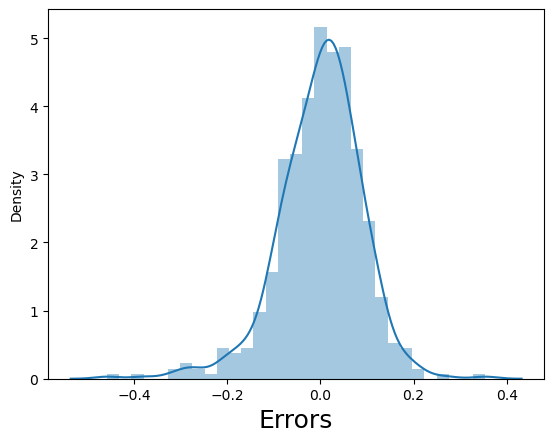

In [93]:
# Plot the histogram of the error terms
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. tenth model.

#### Applying the scaling on the test sets

In [94]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [95]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,june,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
# Adding constant variable to test dataframe
X_test_m10 = sm.add_constant(X_test)

In [98]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m10 = X_test_m10.drop(["atemp", "aug", "oct","mar","june","hum","may","feb","summer"], axis = 1)

In [99]:
# Making predictions using the fourth model

y_pred_m10 = lr_10.predict(X_test_m10)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

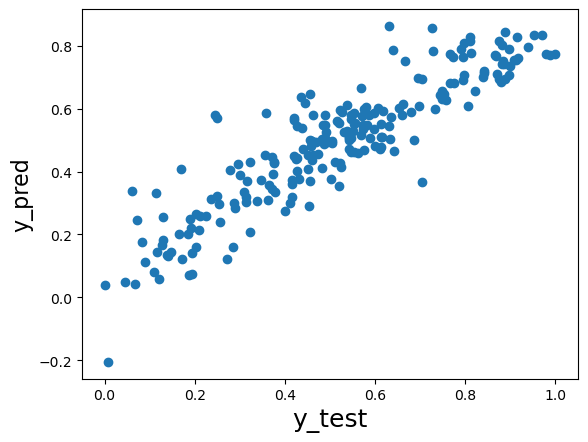

In [102]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()


We can see that the equation of our best fitted line is:

$ cnt = 0.289 + 0.235 X yr - 0.091 X holiday + 0.403 X temp - 0.154 X windspeed - 0.103 X spring + 0.065 X winter - 0.081 X cloudy_weather - 0.295 X little_snow&rain_weather - 0.051 X dec - 0.056 X jan -0.064 X jul - 0.049 X nov + 0.054 X sep $


In [103]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_m10)

0.8032956634698827

We can see that the R squared value of test state is 0.803 which is very close to the R squared value for the train set 0.838